<a href="https://colab.research.google.com/github/MariaTarcius/ML-dataset/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [ ]:
pdata = pd.read_csv("/content/archive (9).zip")

In [ ]:
pdata.shape # Check number of columns and rows in data frame

(2126, 22)

In [ ]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
pdata.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [ ]:
pdata.head() # To check first 5 rows of data set

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [ ]:
pdata.isnull().values.any() # If there are any null values in data set

False

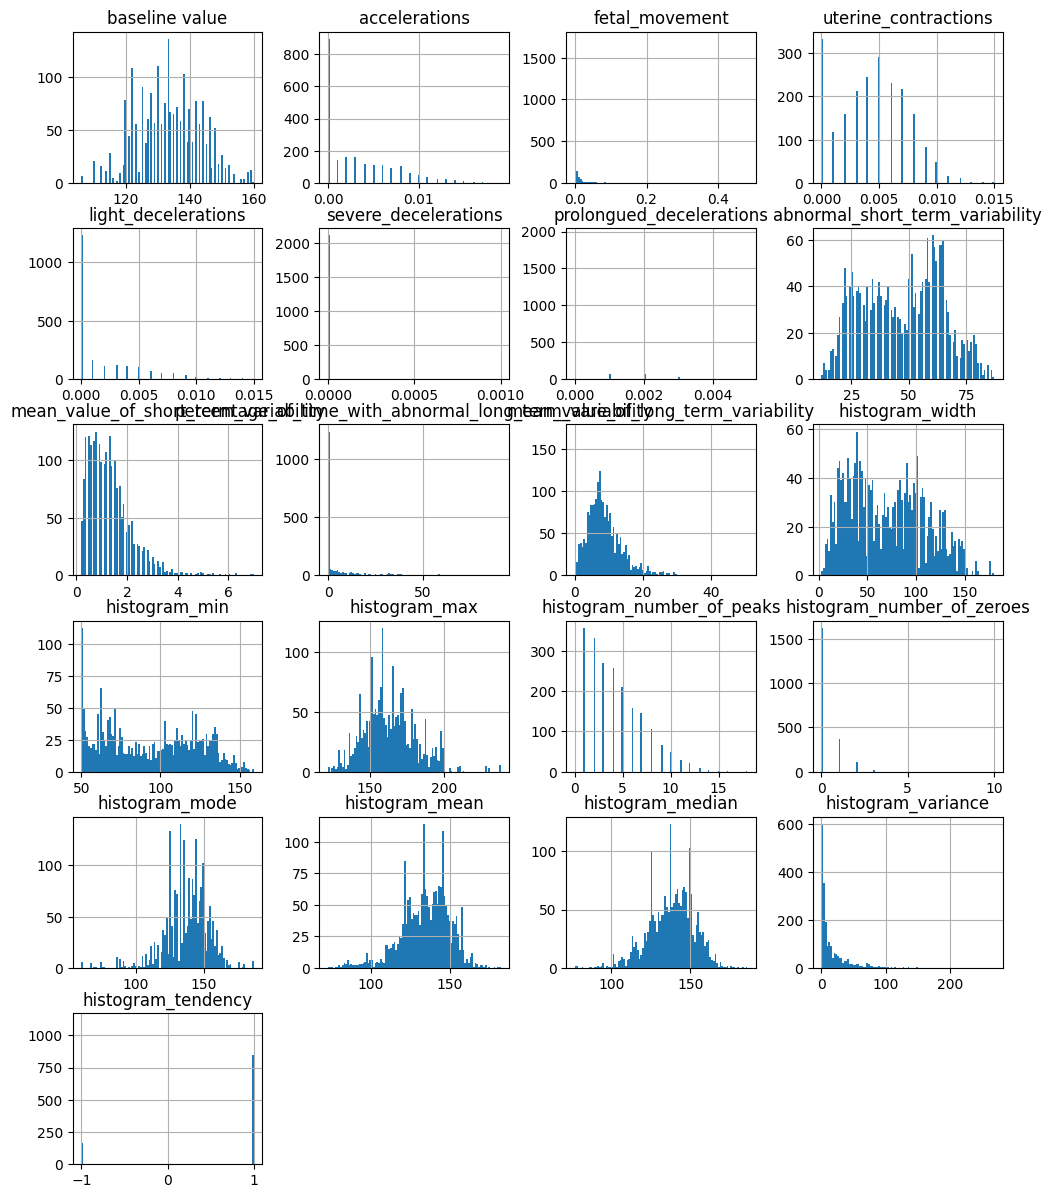

In [ ]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(12,4));
# Histogram of first 8 columns

## Identify Correlation in data

In [ ]:
pdata.corr() # It will show correlation matrix

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.148151   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.364066   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

In [ ]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 13))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

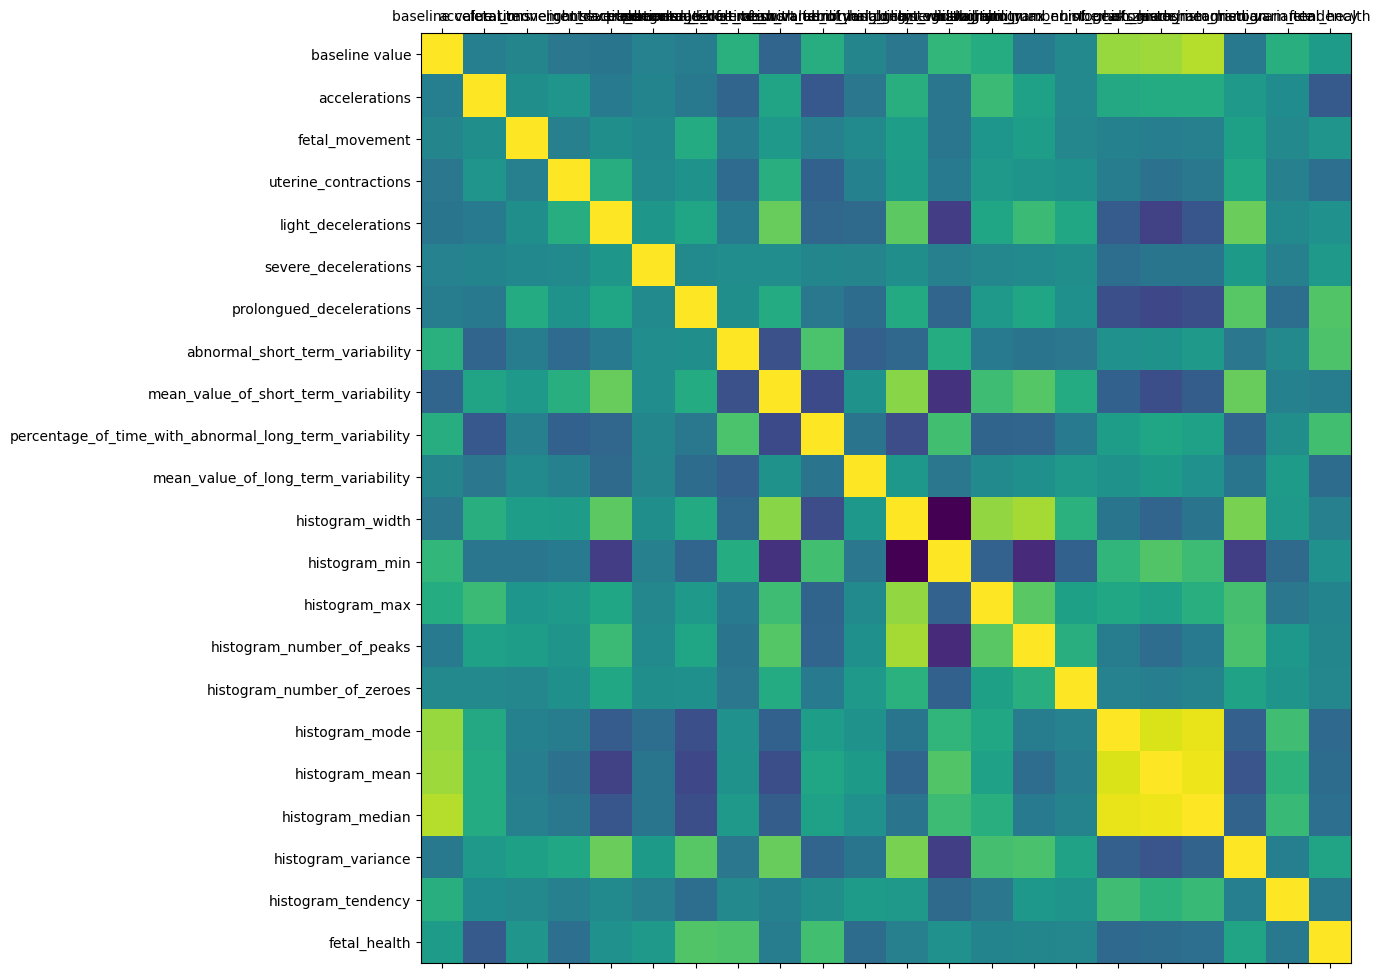

In [ ]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

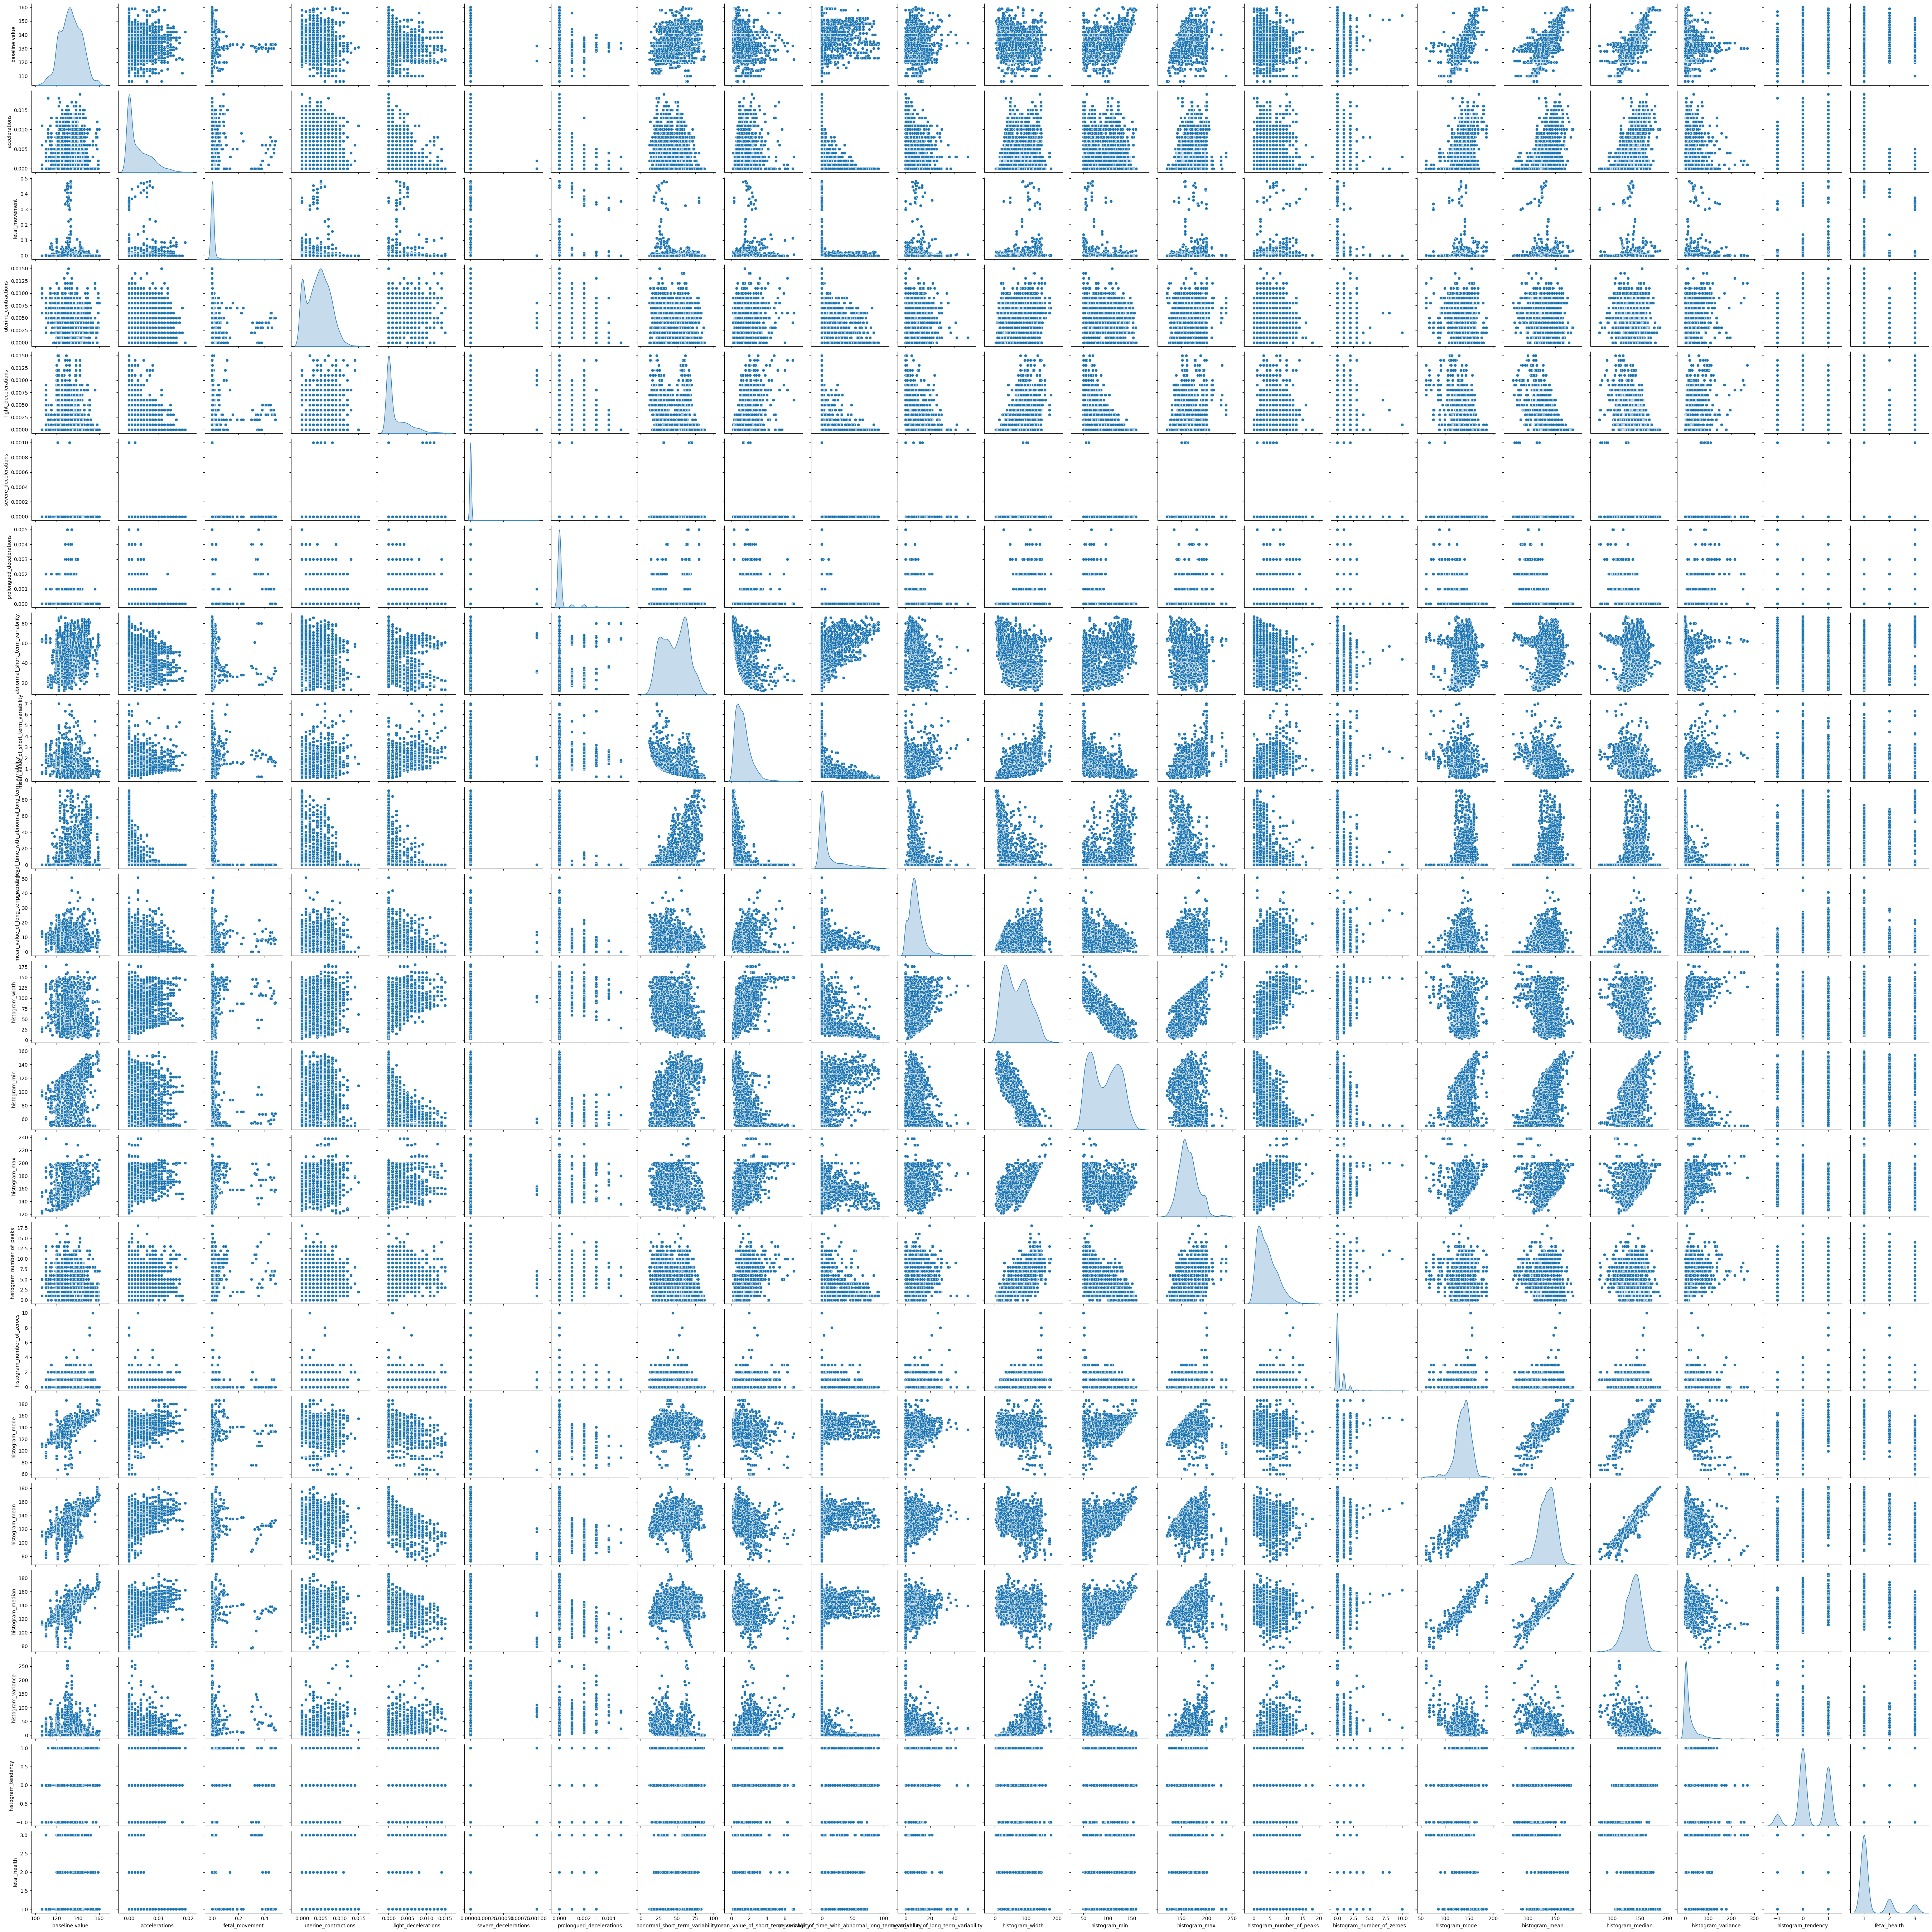

In [ ]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable

In [ ]:
n_true = len(pdata.loc[pdata['fetal_health'] == True])
n_false = len(pdata.loc[pdata['fetal_health'] == False])
print("Number of true cases: {0} ({1:2.3f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.3f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 1655 (100.000%)
Number of false cases: 0 (0.000%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

## Spliting the data
We will use 70% of data for training and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = pdata.drop('fetal_health',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['fetal_health']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
612            143.0          0.005           0.013                 0.003   
1540           136.0          0.006           0.000                 0.006   
1325           128.0          0.004           0.010                 0.005   
834            128.0          0.007           0.000                 0.003   
133            159.0          0.001           0.000                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
612                 0.000                   0.0                     0.000   
1540                0.000                   0.0                     0.000   
1325                0.005                   0.0                     0.001   
834                 0.005                   0.0                     0.000   
133                 0.000                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
612                              39.0                                   1.6   
1540                             43.0                                   0.7   
1325                             25.0                                   2.0   
834                              23.0                                   2.4   
133                              61.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
612                                                 0.0       ...   
1540                                                1.0       ...   
1325                                                0.0       ...   
834                                                 0.0       ...   
133                                                 8.0       ...   

      histogram_width  histogram_min  histogram_max  \
612             136.0           60.0          196.0   
1540             39.0          120.0          159.0   
1325             91.0           65.0          156.0   
834             101.0           70.0          171.0   
133              44.0          133.0          177.0   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
612                         9.0                         1.0           148.0   
1540                        0.0                         1.0           145.0   
1325                        8.0                         0.0           133.0   
834                         7.0                         1.0           155.0   
133                         4.0                         0.0           165.0   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
612            149.0             150.0                 8.0                 0.0  
1540           144.0             146.0                 2.0                 0.0  
1325           125.0             131.0                41.0                 1.0  
834            140.0             144.0                46.0                 1.0  
133            164.0             166.0                 1.0                 1.0  

[5 rows x 21 columns]

Lets check split of data

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

79.96% data is in training set
20.04% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [ ]:
x_train.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
612            143.0          0.005           0.013                 0.003   
1540           136.0          0.006           0.000                 0.006   
1325           128.0          0.004           0.010                 0.005   
834            128.0          0.007           0.000                 0.003   
133            159.0          0.001           0.000                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
612                 0.000                   0.0                     0.000   
1540                0.000                   0.0                     0.000   
1325                0.005                   0.0                     0.001   
834                 0.005                   0.0                     0.000   
133                 0.000                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
612                              39.0                                   1.6   
1540                             43.0                                   0.7   
1325                             25.0                                   2.0   
834                              23.0                                   2.4   
133                              61.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
612                                                 0.0       ...   
1540                                                1.0       ...   
1325                                                0.0       ...   
834                                                 0.0       ...   
133                                                 8.0       ...   

      histogram_width  histogram_min  histogram_max  \
612             136.0           60.0          196.0   
1540             39.0          120.0          159.0   
1325             91.0           65.0          156.0   
834             101.0           70.0          171.0   
133              44.0          133.0          177.0   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
612                         9.0                         1.0           148.0   
1540                        0.0                         1.0           145.0   
1325                        8.0                         0.0           133.0   
834                         7.0                         1.0           155.0   
133                         4.0                         0.0           165.0   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
612            149.0             150.0                 8.0                 0.0  
1540           144.0             146.0                 2.0                 0.0  
1325           125.0             131.0                41.0                 1.0  
834            140.0             144.0                46.0                 1.0  
133            164.0             166.0                 1.0                 1.0  

[5 rows x 21 columns]

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 612 to 1061
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1700 non-null   float64
 1   accelerations                                           1700 non-null   float64
 2   fetal_movement                                          1700 non-null   float64
 3   uterine_contractions                                    1700 non-null   float64
 4   light_decelerations                                     1700 non-null   float64
 5   severe_decelerations                                    1700 non-null   float64
 6   prolongued_decelerations                                1700 non-null   float64
 7   abnormal_short_term_variability                         1700 non-null   float64
 8   mean_value_of_short_term_variability     

We can see lots of 0 entries above.

### Replace 0s with serial mean

In [ ]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           143.0          0.005        0.013000                 0.003   
1           136.0          0.006        0.024849                 0.006   
2           128.0          0.004        0.010000                 0.005   
3           128.0          0.007        0.024849                 0.003   
4           159.0          0.001        0.024849                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0             0.004611                 0.001                  0.001913   
1             0.004611                 0.001                  0.001913   
2             0.005000                 0.001                  0.001000   
3             0.005000                 0.001                  0.001913   
4             0.004611                 0.001                  0.001913   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             39.0                                   1.6   
1                             43.0                                   0.7   
2                             25.0                                   2.0   
3                             23.0                                   2.4   
4                             61.0                                   0.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                          23.165021       ...   
1                                           1.000000       ...   
2                                          23.165021       ...   
3                                          23.165021       ...   
4                                           8.000000       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0            136.0           60.0          196.0                   9.000000   
1             39.0          120.0          159.0                   4.301793   
2             91.0           65.0          156.0                   8.000000   
3            101.0           70.0          171.0                   7.000000   
4             44.0          133.0          177.0                   4.000000   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                    1.000000           148.0           149.0   
1                    1.000000           145.0           144.0   
2                    1.380835           133.0           125.0   
3                    1.000000           155.0           140.0   
4                    1.380835           165.0           164.0   

   histogram_median  histogram_variance  histogram_tendency  
0             150.0                 8.0            0.671533  
1             146.0                 2.0            0.671533  
2             131.0                41.0            1.000000  
3             144.0                46.0            1.000000  
4             166.0                 1.0            1.000000  

[5 rows x 21 columns]

# Logistic Regression

In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.045769  0.000153 -0.002045  0.000218  0.000147  0.000012  0.000012   
1 -0.078881 -0.000157  0.001054 -0.000168 -0.000098 -0.000011 -0.000022   
2  0.124650  0.000004  0.000990 -0.000050 -0.000049 -0.000001  0.000010   

          7         8         9  ...        12        13        14        15  \
0 -0.056659  0.060708 -0.031448  ...  0.002862  0.017523 -0.071333  0.008089   
1  0.009427 -0.057937 -0.009618  ... -0.006666 -0.013241  0.056567 -0.008909   
2  0.047232 -0.002771  0.041066  ...  0.003804 -0.004282  0.014767  0.000821   

         16        17        18        19        20  intercept  
0  0.002049  0.004683  0.058685 -0.017153 -0.006407   0.012004  
1  0.013194  0.077346  0.011608 -0.001792  0.001657  -0.010944  
2 -0.015243 -0.082028 -0.070292  0.018945  0.004750  -0.001060  

[3 rows x 22 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8192488262910798


<Axes: >

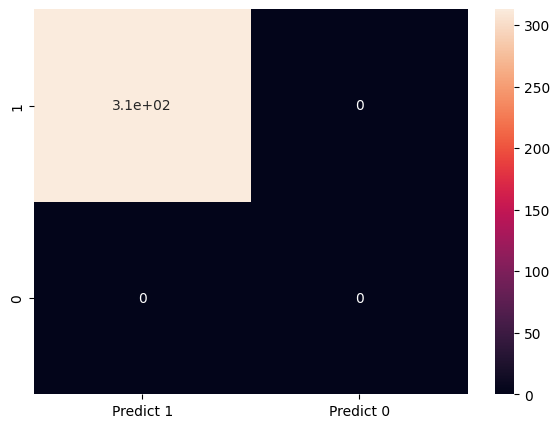

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have fetal health 48

True Negatives (TN): we correctly predicted that they don't have fetal health 132

False Positives (FP): we incorrectly predicted that they do have fetal health (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have fetal health (a "Type II error") 37 Falsely predict negative Type II error